# Lab8. Audio corpus creation and binary classification using DNN

In [1]:
!pip install librosa

In [2]:
import os
import numpy as np
import pandas as pd
import librosa
import scipy.signal
import tensorflow as tf
import time
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential

In [4]:
def process_audio_files(folder_path):
    audio_data=[]
    file_list=os.listdir(folder_path)
    mp3_files=[file for file in file_list if file.endswith('.mp3')]
    for mp3_file in mp3_files:
        file_path=os.path.join(folder_path,mp3_file)
        y,sr=librosa.load(file_path,sr=None)
        audio_data.append((y, sr))
    return audio_data

In [6]:
folder_path='sample_data//cat'
audio=process_audio_files(folder_path)

In [7]:
audio

[(array([0.        , 0.        , 0.        , ..., 0.02211756, 0.02021475,
         0.01168255], dtype=float32),
  48000),
 (array([0.        , 0.        , 0.        , ..., 0.02002131, 0.02306777,
         0.01730498], dtype=float32),
  48000),
 (array([0.        , 0.        , 0.        , ..., 0.02088441, 0.02539636,
         0.01974409], dtype=float32),
  48000),
 (array([ 0.        ,  0.        ,  0.        , ..., -0.01336266,
         -0.01330735, -0.0091626 ], dtype=float32),
  48000),
 (array([ 0.        ,  0.        ,  0.        , ..., -0.0163647 ,
         -0.01587155, -0.01154031], dtype=float32),
  48000),
 (array([ 0.        ,  0.        ,  0.        , ..., -0.009379  ,
         -0.0107859 , -0.00566604], dtype=float32),
  48000),
 (array([ 0.        ,  0.        ,  0.        , ..., -0.00780205,
         -0.00998528, -0.00769939], dtype=float32),
  48000),
 (array([0.        , 0.        , 0.        , ..., 0.01750566, 0.02169211,
         0.01574345], dtype=float32),
  48000),


In [8]:
folder_path='sample_data//mat'
audio1=process_audio_files(folder_path)

In [9]:
audio1

[(array([0.        , 0.        , 0.        , ..., 0.04415061, 0.05186606,
         0.04076651], dtype=float32),
  48000),
 (array([ 0.        ,  0.        ,  0.        , ..., -0.02186836,
         -0.02531097, -0.01882702], dtype=float32),
  48000),
 (array([ 0.        ,  0.        ,  0.        , ..., -0.00283113,
         -0.00390778, -0.00514695], dtype=float32),
  48000),
 (array([0.        , 0.        , 0.        , ..., 0.00397619, 0.00869065,
         0.00809947], dtype=float32),
  48000),
 (array([0.        , 0.        , 0.        , ..., 0.0245386 , 0.03200411,
         0.02712047], dtype=float32),
  48000),
 (array([ 0.        ,  0.        ,  0.        , ..., -0.02233866,
         -0.02426209, -0.02025038], dtype=float32),
  48000),
 (array([0.        , 0.        , 0.        , ..., 0.03597236, 0.03660373,
         0.02603437], dtype=float32),
  48000),
 (array([ 0.        ,  0.        ,  0.        , ..., -0.0363427 ,
         -0.03576628, -0.02407473], dtype=float32),
  48000),


###### Step-2

In [10]:
def extract_stft_features(audio_data,max_frames,max_bins):
    stft_features=[]
    for audio in audio_data:
        y,sr=audio
        _,_,Zxx =scipy.signal.stft(y, fs=sr)
        stft_magnitude=np.abs(Zxx)
        pad_rows=max_frames-stft_magnitude.shape[0]
        pad_cols=max_bins-stft_magnitude.shape[1]
        stft_magnitude=np.pad(stft_magnitude,((0,max(0,pad_rows)),(0,max(0,pad_cols))),mode='constant')
        stft_magnitude=stft_magnitude[:max_frames,:max_bins]
        stft_features.append(stft_magnitude)
    return np.array(stft_features)

In [11]:
max_frames=100
max_bins=129

In [15]:
cat=extract_stft_features(audio,max_frames,max_bins)
mat=extract_stft_features(audio1,max_frames,max_bins)

In [13]:
cat

array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         2.02262122e-02, 5.01466542e-02, 2.20277067e-02],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         2.58404166e-02, 3.26694921e-02, 1.87698919e-02],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.53764291e-02, 1.59718879e-02, 9.06452816e-03],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         9.15302607e-08, 5.67605376e-08, 1.00192395e-07],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         4.69978652e-08, 2.88961459e-08, 1.90485032e-08],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.68948855e-08, 1.29001565e-08, 2.12374651e-08]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.57098044e-02, 1.61150210e-02, 1.29205838e-03],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.07490625e-02, 1.01810182e-02, 6.71091303e-03],
        [0.00000000e+00, 

In [16]:
mat

array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         6.76671863e-02, 3.75292711e-02, 2.38517374e-02],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         3.97355147e-02, 2.19617300e-02, 3.04844771e-02],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         9.68677085e-03, 3.49362986e-03, 1.09125739e-02],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         6.60876083e-08, 1.32129330e-07, 1.93034012e-07],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.43331178e-08, 1.97977688e-08, 8.26928925e-09],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         3.61376351e-09, 4.81006834e-09, 1.51211232e-09]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.48089146e-02, 2.29577441e-02, 2.44681407e-02],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.45090669e-02, 1.72619764e-02, 1.79888830e-02],
        [0.00000000e+00, 

###### Step-3

In [17]:
class_labels=['cat','mat']
num_classes=len(class_labels)

In [18]:
all_stft_features=cat+mat
all_labels=[0]*len(cat)+[1]*len(mat)

In [19]:
indices=np.arange(len(all_stft_features))
np.random.shuffle(indices)
all_stft_features=[all_stft_features[i] for i in indices]
all_labels=[all_labels[i] for i in indices]

In [20]:
split_ratio=0.75
split_index=int(len(all_stft_features) * split_ratio)
x_train,y_train=all_stft_features[:split_index],all_labels[:split_index]
x_test,y_test=all_stft_features[split_index:],all_labels[split_index:]

In [21]:
x_train=np.array(x_train).astype(np.float32)
x_test=np.array(x_test).astype(np.float32)
y_train=np.array(y_train).astype(np.int32)
y_test=np.array(y_test).astype(np.int32)

In [23]:
x_train.shape

(7, 100, 129)

In [24]:
x_test.shape

(3, 100, 129)

In [25]:
y_train.shape

(7,)

In [26]:
y_test.shape

(3,)

###### Step-4

In [27]:
def create_model(input_shape,num_classes):
    model=Sequential()
    model.add(Flatten(input_shape=input_shape))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes,activation='softmax'))
    return model

In [28]:
input_shape=x_train[0].shape
model=create_model(input_shape,num_classes)
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 12900)             0         
                                                                 
 dense (Dense)               (None, 128)               1651328   
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 1,651,586
Trainable params: 1,651,586
Non-trainable params: 0
_________________________________________________________________


In [30]:
history=model.fit(x_train,y_train,batch_size=32,epochs=20,validation_split=0.1)

Epoch 1/20
1/1 [==============================] - 0s 139ms/step - loss: 0.3637 - accuracy: 1.0000 - val_loss: 0.2796 - val_accuracy: 1.0000
Epoch 2/20
1/1 [==============================] - 0s 90ms/step - loss: 0.3398 - accuracy: 1.0000 - val_loss: 0.2531 - val_accuracy: 1.0000
Epoch 3/20
1/1 [==============================] - 0s 99ms/step - loss: 0.3173 - accuracy: 1.0000 - val_loss: 0.2286 - val_accuracy: 1.0000
Epoch 4/20
1/1 [==============================] - 0s 101ms/step - loss: 0.2963 - accuracy: 1.0000 - val_loss: 0.2061 - val_accuracy: 1.0000
Epoch 5/20
1/1 [==============================] - 0s 73ms/step - loss: 0.2767 - accuracy: 1.0000 - val_loss: 0.1854 - val_accuracy: 1.0000
Epoch 6/20
1/1 [==============================] - 0s 85ms/step - loss: 0.2584 - accuracy: 1.0000 - val_loss: 0.1665 - val_accuracy: 1.0000
Epoch 7/20
1/1 [==============================] - 0s 98ms/step - loss: 0.2413 - accuracy: 1.0000 - val_loss: 0.1493 - val_accuracy: 1.0000
Epoch 8/20
1/1 [=========

In [31]:
test_loss,test_accuracy=model.evaluate(x_test,y_test)
print("Test Loss:",test_loss)
print("Test Accuracy:",test_accuracy)

1/1 [==============================] - 0s 30ms/step - loss: 0.0217 - accuracy: 1.0000
Test Loss: 0.02172904647886753
Test Accuracy: 1.0


###### Step-5

In [32]:
def create_model_with_config(input_shape,num_classes,num_nodes,num_layers):
    model = Sequential()
    model.add(Flatten(input_shape=input_shape))
    for _ in range(num_layers):
        model.add(Dense(num_nodes, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

In [33]:
nodes_list=[8, 16, 32, 64, 128]
layers_list=[2, 3, 4]

In [34]:
num_params_list=[]
train_accuracy_list=[]
test_accuracy_list=[]
running_time_list=[]

for num_nodes in nodes_list:
    for num_layers in layers_list:
        model=create_model_with_config(input_shape,num_classes,num_nodes,num_layers)
        model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
        start_time=time.time()
        history=model.fit(x_train,y_train,batch_size=32,epochs=20,validation_split=0.1,verbose=0)
        end_time=time.time()
        running_time=end_time-start_time
        _,train_accuracy=model.evaluate(x_train,y_train,verbose=0)
        _,test_accuracy=model.evaluate(x_test, y_test,verbose=0)
        num_params=model.count_params()

        num_params_list.append(num_params)
        train_accuracy_list.append(train_accuracy)
        test_accuracy_list.append(test_accuracy)
        running_time_list.append(running_time)

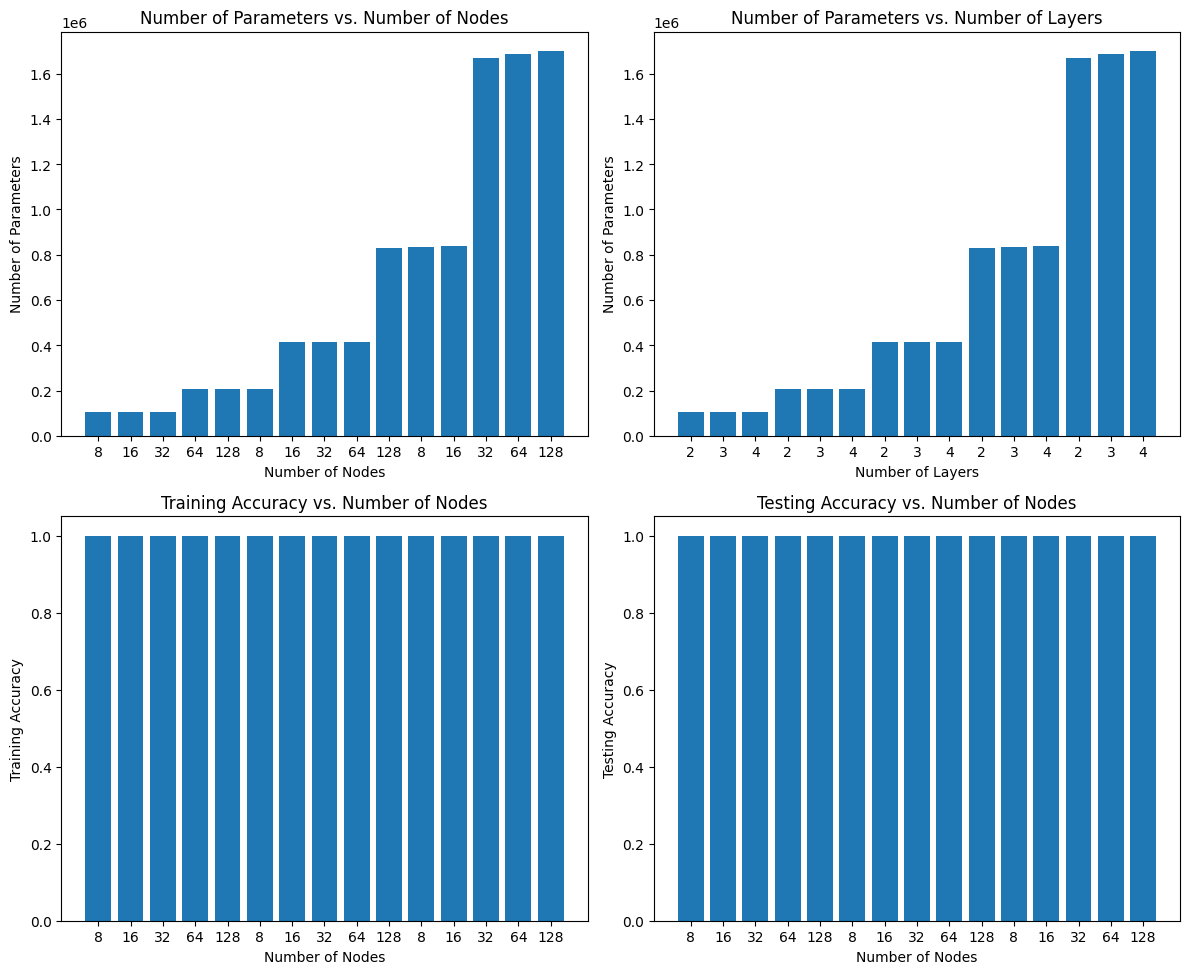

In [35]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes[0, 0].bar(range(len(num_params_list)), num_params_list)
axes[0, 0].set_xticks(range(len(num_params_list)))
axes[0, 0].set_xticklabels(nodes_list * len(layers_list))
axes[0, 0].set_xlabel('Number of Nodes')
axes[0, 0].set_ylabel('Number of Parameters')
axes[0, 0].set_title('Number of Parameters vs. Number of Nodes')

axes[0, 1].bar(range(len(num_params_list)), num_params_list)
axes[0, 1].set_xticks(range(len(num_params_list)))
axes[0, 1].set_xticklabels(layers_list * len(nodes_list))
axes[0, 1].set_xlabel('Number of Layers')
axes[0, 1].set_ylabel('Number of Parameters')
axes[0, 1].set_title('Number of Parameters vs. Number of Layers')

axes[1, 0].bar(range(len(train_accuracy_list)), train_accuracy_list)
axes[1, 0].set_xticks(range(len(train_accuracy_list)))
axes[1, 0].set_xticklabels(nodes_list * len(layers_list))
axes[1, 0].set_xlabel('Number of Nodes')
axes[1, 0].set_ylabel('Training Accuracy')
axes[1, 0].set_title('Training Accuracy vs. Number of Nodes')

axes[1, 1].bar(range(len(test_accuracy_list)), test_accuracy_list)
axes[1, 1].set_xticks(range(len(test_accuracy_list)))
axes[1, 1].set_xticklabels(nodes_list * len(layers_list))
axes[1, 1].set_xlabel('Number of Nodes')
axes[1, 1].set_ylabel('Testing Accuracy')
axes[1, 1].set_title('Testing Accuracy vs. Number of Nodes')

plt.tight_layout()
plt.show()
